# 간단한 분류 알고리즘 훈련


In [1]:
from IPython.display import Image

# 2.1 인공 뉴런 : 초기 머신러닝의 간단한 역사
* 1943년 워렌 맥컬록(Warren McCulloch)과 월터 피츠(Walter Pitts)가 맥컬록-피츠(MCP) 뉴런 발표
* 프랑크 로젠블라트(Frank Rosenblatt)는 MCP 뉴런 모델을 기반으로 퍼셉트론 학습 개념을 발표

In [2]:
Image(url='https://git.io/JtIbf', width=500) 

#### 2.1.1 인공 뉴런의 수학적 정의
* 인공 뉴런(artificial neuron) 아이디어를 두 개의 클래스가 있는 이진 분류(binary classification) 작업으로 볼 수 있다.
* 두 클래스 = 1(양성 클래스)와 -1(음성 클래스)로 나타낸다.

$\boldsymbol{w}=\begin{bmatrix} w_1 \\ \vdots \\ w_m\end{bmatrix}$ , 
$\boldsymbol{x}=\begin{bmatrix} x_1 \\ \vdots \\ x_m\end{bmatrix}$

최종 입력(net input) : $z = w_1x_1 + w_2x_2 + \cdots + w_mx_m$


벡터 점곱(dot product), 행렬 곱셈(matrix multiplication) : 
$\begin{bmatrix}1&2&3\end{bmatrix}\times\begin{bmatrix}4\\5\\6\end{bmatrix}=1\times4+2\times5+3\times6=32$

점곱을 사용한 표현 : $z = w_1x_1+\cdots+w_mx_m=\sum_{j=1}^mx_jw_j=\boldsymbol{w}^T\boldsymbol{x}$

퍼셉트론의 결정 함수 : $\phi(z)=\begin{cases}1&z\ge\theta\mbox{ 일 때} \\ -1&\mbox{그 외}\end{cases}$
$\;\;\;\;\;$
$\phi(z)=\begin{cases}1&z-\theta\ge0\mbox{ 일 때} \\ -1&\mbox{그 외}\end{cases}$

$w_0=-\theta , x_0=1$ 일 때 : $z_{new} = w_0x_0+w_1x_1+\cdots+w_mx_m=\sum_{j=0}^mx_jw_j=\boldsymbol{w}^T\boldsymbol{x}$

In [3]:
# 퍼셉트론 결정 함수(단위 계단 함수)와 결정 경계(구별 선)
Image(url='https://git.io/JtIbL', width=500) 

퍼셉트론 결정 함수로 최종 입력 $z=\boldsymbol{w}^T\boldsymbol{x}$ 가 이진 출력(-1 또는 1)으로 압축되는 방법(왼쪽 그림)과 이를 사용하여 선형 분리가 가능한 두 개의 클래스 사이를 구별하는 방법(오른쪽 그림)이다. 

#### 2.1.2 퍼셉트론 학습 규칙
* 환원주의 접근 방식, 추력을 내거나 내지 않는 두 가지 경우만 있음.
* 초기 퍼셉트론 학습 규칙
    * 가중치를 0 또는 랜덤한 작은 값으로 초기화
    * 각 훈련 샘플 $x^{(i)}$ 에서 다음 작업을 한다.
        * 출력값 $\hat{y}$ 를 계산
        * 가중치 업데이트

* 가중치 벡터 w에 있는 개별 가중치 $w_j$가 동시 업데이트 : $w_j := w_j + \Delta w_j$

* 가중치 $w_j$에 대한 업데이트 값(또는 $w_j$의 변화량)인 $\Delta w_j$ 값 : $\Delta w_j = \eta(y^{(i)}-\hat{y}^{(i)})x_j^{(i)}$

    * $\eta$ : 학습률(learning rate, 0.0~`.0 사이 실수)
    * $(y^{(i)}$ : i번째 훈련 샘플의 클래스 레이블 값
    * $\hat{y}^{(i)}$ : 예측 클래스 레이블

* 클래스 레이블을 정확히 예측한 경우
    * $y^{(i)}=-1,\; \hat{y}^{(i)}=-1, \qquad \Delta w_j=\eta(-1-(-1))x_j^{(i)}=0$
    
    * $y^{(i)}=1,\; \hat{y}^{(i)}=1, \qquad \Delta w_j=\eta(1-1)x_j^{(i)}=0$

* 클래스 레이블을 잘못 예측한 경우

    * $y^{(i)}=1,\;\hat{y}^{(i)}=-1, \qquad \Delta w_j=\eta(1-(-1))x_j^{(i)}=\eta(2)x_j^{(i)}$

    * $y^{(i)}=-1,\;\hat{y}^{(i)}=1, \qquad \Delta w_j=\eta(-1-1)x_j^{(i)}=\eta(-2)x_j^{(i)}$


예를 들어 $\hat{y}^{(i)}=-1,\;y^{(i)}=+1,\;\eta=1$ 이고, $x_j^{(i)}=0.5$ 일 때 : 

$\Delta w_j=(1-(-1))0.5=(2)0.5=1$

$x_j^{(i)}=2$ 일 때 : 

$\Delta w_j=(1-(-1))2=(2)2=4$

* 퍼셉트론은 두 클래스가 선형적으로 구분되고 학습률이 충분히 작을 때만 수렴이 보장된다.

* 두 클래스를 선형 결정 경계로 나눌 수 없다면 훈련 데이터셋을 반복할 최대 횟수(에포크(epoch))를 지정하고 분류 허용 오차를 지정할 수 있다. 그렇지 않으면 퍼셉트론은 가중치 업데이트를 멈추지않음



In [4]:
Image(url='https://git.io/JtIbq', width=600) 

In [5]:
# 퍼셉트론 알고리즘
Image(url='https://git.io/JtIbO', width=600)

* 퍼셉트론 개념 정리
    * 퍼셉트론이 샘플 x를 입력받아 가중치 w를 연결하여 최종 입력을 계산하는 방법

        * 최종 입력은 임계 함수로 전달되어 샘플의 예측 클래스 레이블인 -1 또는 1의 이진 출력을 만듬
        * 학습 단계에서 이 출력을 사용하여 예측 오차를 계산하고 가중치 업데이트

# 2.2 퍼셉트론 학습 알고리즘 구현

### 2.2.1 객체 지향 퍼셉트론 API


In [6]:
import numpy as np

class Perceptron(object):
    # 퍼셉트론 분류기
    # 매개변수 : eta, n_iter, random_state
    # eta : 학습률(0.0 ~ 1.0), float
    # n_iter : 훈련 데이터셋 반복 횟수, int
    # random_state : 가중치 무작위 초기화를 위한 난수 생성기 시드, int
    # 속성
    # w_ : 학습된 가중치, 1d-array
    # error_ : 에포크마다 누적된 분류 오류, list
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        # 훈련 데이터 학습
        # 매개 변수 : X, y
        # X : n_samples개의 샘플과 n_features개의 특정으로 이루어진 훈련 데이터
        #       array-like, shape = [n_samples, n_features]
        # y : 타깃값, array-like, shape = [n_samples]
        # 반환값 self : object
        rgen = np.random.RandomState(self.random_state) # 랜덤 시드
        # 표준 편차가 0.01인 정규 분포에서 랜덤한 작은 수
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X): # 입력 계산
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X): # 단위 계단 함수를 사용하여 클래스 레이블을 반환
        return np.where(self.net_input(X) >= 0.0, 1, -1)

$\boldsymbol{w}^{(1)} = \boldsymbol{w}^{(0)}+\mathit\Delta\boldsymbol{w}=\boldsymbol{w}^{(0)}+\eta(\boldsymbol{y}-\boldsymbol{\hat{y}})\boldsymbol{x}=\eta(\boldsymbol{y}-\phi(\boldsymbol{w}^{(0)}\boldsymbol{x}))\boldsymbol{x}=\eta(\boldsymbol{y}+1)\boldsymbol{x}$

$a\cdot b =\vert a\vert\vert b\vert\text{cos}\theta$

$\theta=\text{cos}^{-1}\dfrac{a\cdot b}{\vert a\vert\vert b\vert}$


In [7]:
# 가중치를 0이 아니어야 학습률 eta가 분류 결과에 영향을 준다.
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
# np.arccos : 역코사인 삼각 함수
# np.linalg.norm : 벡터 길이를 계산하는 함수
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

### 2.2.2 붓꽃 데이터셋에서 퍼셉트론 훈련


In [8]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

* 50개의 Iris-setosa와 50개의 Iris-versicolor 꽃에 해당하는 처음 100개의 클래스 레이블을 추출
* 클래스 레이블을 두 개의 정수 클래스 1(versicolor)과 -1(setosa)로 바꾼 후 벡터 y에 저장

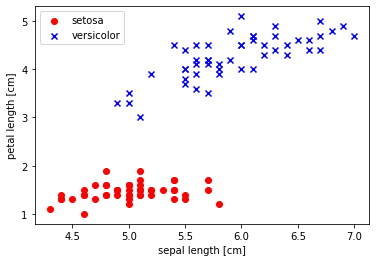

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# setosa와 versicolor를 선택
y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1) # setosa는 -1, versicolor는 1

# 꽃받침 길이와 꽃잎 길이 추출
X = df.iloc[:100, [0, 2]].values

# 산점도
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

* 퍼셉트론 모델 훈련

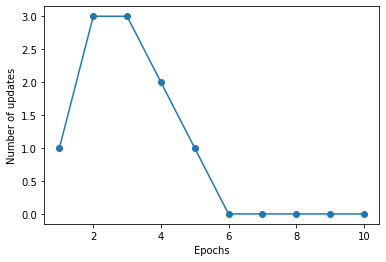

In [10]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

* 결정 경계 그래프 함수

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # 마커와 컬러맵을 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # 꽃받침 길이 최소/최대
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # 꽃잎 길이 최소/최대
    # np.meshgrid : 그리드 배열, 2차원 평면의 최대값과 최소값 좌표를 전달
    # resolution 간격
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor=None if idx==1 else 'black')

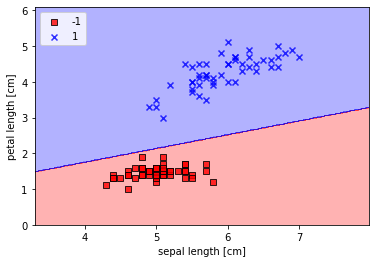

In [12]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')